# Problem 4
## Problem 8 from Chapter 5

We will now perform cross-validation on a simulated data set.

In [70]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

## Part A
Generate a simulated data set as follows:
```
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)
```
In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [71]:
random.seed(1)
x = np.random.randn(100)
y = (x-(2*(x*x)) + np.random.randn(100))

N is number of samples and in this case it is 100. P is number of predictors and equal to 1 in this case

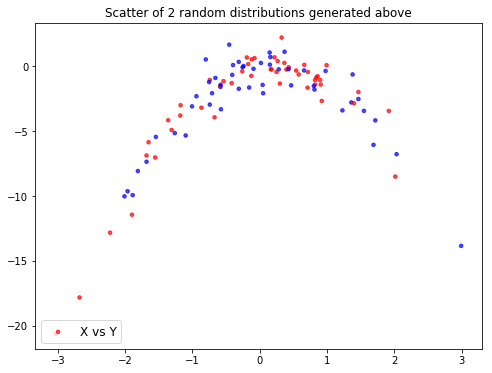

In [72]:
## creating a scatter plto
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
_ = ax.scatter(x, y, alpha=0.7, s=50, color = ['red','blue'], marker= '.', label="X vs Y")
_ = plt.title('Scatter of 2 random distributions generated above', FontSize=12)
_ = plt.legend(loc=3, prop={'size' : 12})
_ = plt.show()

## Part B
Create a scatterplot of X against Y . Comment on what you find.

X and Y are highly correlated. y is simply shift of x with added gaussian noise

## Part C
Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
5.4 Exercises 201
$$i. Y = β0 + β1X +$$
$$ii. Y = β0 + β1X + β2X2 +$$
$$iii. Y = β0 + β1X + β2X2 + β3X3 +$$
$$iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + .$$
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [73]:
## getting leave one out and linear regression model
loo = LeaveOneOut()
clf = LinearRegression()

#creating copies of the original data for local use
x_copy =x
y_copy =y

# creating arrays with power 2,3,4 of x to use in models 2,3,4
x_2 = np.power(x_copy, 2)
x_3 = np.power(x_copy, 3)
x_4 = np.power(x_copy, 4)

In [74]:
#1
#generating a data frame from generated data
#creating dictionary to generate data frame
dict_data = {'x':x_copy,
       'y':y_copy}
dataset_1 = pd.DataFrame(dict_data)

In [75]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_1 = []
def calc_mse_1(train_index, test_index):
    train = dataset_1.loc[train_index]
    test = dataset_1.loc[test_index]
    X_train = train['x'].values.reshape(-1,1)
    y_train = train['y']
    X_test = test['x'].values.reshape(-1,1)
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_1.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_1):
    calc_mse_1(train_index, test_index)

scores_1 = np.asarray(scores_1)
mean_1 = np.mean(scores_1)

print("Mean of the scores with 1 degrees of freedom is {}".format(mean_1))

Mean of the scores with 1 degrees of freedom is 14.282677430335353


In [76]:
#2
#creating dictionary to generate data fram
dict_data = {'x':x_copy,
            'x^2':x_2,
             'y':y_copy}
dataset_2 = pd.DataFrame(dict_data)

In [77]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_2 = []
def calc_mse_2(train_index, test_index):
    train = dataset_2.loc[train_index]
    test = dataset_2.loc[test_index]
    X_train = train[['x','x^2']]
    y_train = train['y']
    X_test = test[['x','x^2']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_2.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_2):
    calc_mse_2(train_index, test_index)

scores_2 = np.asarray(scores_2)
mean_2 = np.mean(scores_2)

print("Mean of the scores with 2 degrees of freedom is {}".format(mean_2))

Mean of the scores with 2 degrees of freedom is 1.113971598805359


In [78]:
#3
#creating dictionary to generate data fram
dict_data = {'x':x_copy,
            'x^2':x_2,
             'x^3':x_3,
             'y':y_copy}
dataset_3 = pd.DataFrame(dict_data)

In [79]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_3 = []
def calc_mse_3(train_index, test_index):
    train = dataset_3.loc[train_index]
    test = dataset_3.loc[test_index]
    X_train = train[['x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_3.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_3):
    calc_mse_3(train_index, test_index)

scores_3 = np.asarray(scores_3)
mean_3 = np.mean(scores_3)

print("Mean of the scores with 3 degrees of freedom is {}".format(mean_3))

Mean of the scores with 3 degrees of freedom is 1.1578534846373447


In [80]:
#4
#creating dictionary to generate data fram
dict_data = {'x':x_copy,
            'x^2':x_2,
             'x^3':x_3,
             'y':y_copy}
dataset_4 = pd.DataFrame(dict_data)

In [81]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_4 = []
def calc_mse_4(train_index, test_index):
    train = dataset_4.loc[train_index]
    test = dataset_4.loc[test_index]
    X_train = train[['x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_4.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_4):
    calc_mse_4(train_index, test_index)

scores_4 = np.asarray(scores_4)
mean_4 = np.mean(scores_4)

print("Mean of the scores with 4 degrees of freedom is {}".format(mean_4))

Mean of the scores with 4 degrees of freedom is 1.1578534846373447


## Part D
Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [82]:
## generating a new distribution with a random seed
## _n after a variable name refers to coming from this new distribution

random.seed(np.random.randint(10,100))
x_n = np.random.randn(100)
y_n = (x_n-(2*(x_n*x_n)) + np.random.randn(100))

In [83]:
#creating copies of the original data for local use
x_copy_n = x_n
y_copy_n = y_n

# creating arrays with power 2,3,4 of x to use in models 2,3,4
x_2_n = np.power(x_copy_n, 2)
x_3_n = np.power(x_copy_n, 3)
x_4_n = np.power(x_copy_n, 4)

## will be using same loo and linearregression model obtained in part c

In [84]:
#1
#generating a data frame from generated data
#creating dictionary to generate data frame
dict_data = {'x':x_copy_n,
       'y':y_copy_n}
dataset_1_n = pd.DataFrame(dict_data)

In [85]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_1_n = []
def calc_mse_1_n(train_index, test_index):
    train = dataset_1_n.loc[train_index]
    test = dataset_1_n.loc[test_index]
    X_train = train['x'].values.reshape(-1,1)
    y_train = train['y']
    X_test = test['x'].values.reshape(-1,1)
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_1_n.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_1_n):
    calc_mse_1_n(train_index, test_index)

scores_1_n = np.asarray(scores_1_n)
mean_1_n = np.mean(scores_1_n)

print("Mean of the scores with 1 degrees of freedom is {}".format(mean_1_n))

Mean of the scores with 1 degrees of freedom is 10.365941660382717


In [86]:
#2
#creating dictionary to generate data fram
dict_data = {'x':x_copy_n,
            'x^2':x_2_n,
             'y':y_copy_n}
dataset_2_n = pd.DataFrame(dict_data)

In [87]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_2_n = []
def calc_mse_2_n(train_index, test_index):
    train = dataset_2_n.loc[train_index]
    test = dataset_2_n.loc[test_index]
    X_train = train[['x','x^2']]
    y_train = train['y']
    X_test = test[['x','x^2']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_2_n.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_2_n):
    calc_mse_2_n(train_index, test_index)

scores_2_n = np.asarray(scores_2_n)
mean_2_n = np.mean(scores_2_n)

print("Mean of the scores with 2 degrees of freedom is {}".format(mean_2_n))

Mean of the scores with 2 degrees of freedom is 1.1066021246189668


In [88]:
#3
#creating dictionary to generate data fram
dict_data = {'x':x_copy_n,
            'x^2':x_2_n,
             'x^3':x_3_n,
             'y':y_copy_n}
dataset_3_n = pd.DataFrame(dict_data)

In [89]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_3_n = []
def calc_mse_3_n(train_index, test_index):
    train = dataset_3_n.loc[train_index]
    test = dataset_3_n.loc[test_index]
    X_train = train[['x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_3_n.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_3_n):
    calc_mse_3_n(train_index, test_index)

scores_3_n = np.asarray(scores_3_n)
mean_3_n = np.mean(scores_3_n)

print("Mean of the scores with 3 degrees of freedom is {}".format(mean_3_n))

Mean of the scores with 3 degrees of freedom is 1.1501057497722267


In [90]:
#4
#creating dictionary to generate data fram
dict_data = {'x':x_copy_n,
            'x^2':x_2_n,
             'x^3':x_3_n,
             'y':y_copy_n}
dataset_4_n = pd.DataFrame(dict_data)

In [91]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_4_n = []
def calc_mse_4_n(train_index, test_index):
    train = dataset_4_n.loc[train_index]
    test = dataset_4_n.loc[test_index]
    X_train = train[['x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_4_n.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_4_n):
    calc_mse_4_n(train_index, test_index)

scores_4_n = np.asarray(scores_4_n)
mean_4_n = np.mean(scores_4_n)

print("Mean of the scores with 4 degrees of freedom is {}".format(mean_4_n))

Mean of the scores with 4 degrees of freedom is 1.1501057497722267


## Part E
Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

The 2nd model has the smallest mean squared error. This is expected because our data can be modelled best in 2 variables as we can see from the scatter plot. 3 and 4 degrees of freedom result in overfitting which increases our mean error a little.

## Part F
Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?